In [9]:
!pip install numpy
!pip install pandas
!pip install geopandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

## Importing Libraries
1. **numpy:** NumPy for numerical operations and array manipulations.
2. **pandas:** Pandas for data manipulation and analysis.
3. **geopandas:** Geopandas for handling geospatial data.
4. **os:** OS module for interacting with the operating system.
5. **seaborn:** Seaborn for statistical data visualization.
6. **matplotlib.pyplot:** Matplotlib.pyplot for creating static, animated, and interactive visualizations.
7. **Axes3D:** Axes3D for 3D plotting using Matplotlib.
8. **StandardScaler:** StandardScaler for feature standardization.
9. **train_test_split:** Train-test split for dataset splitting.
10. **OneHotEncoder:** OneHotEncoder for categorical variable conversion.
11. **RandomForestClassifier:** RandomForestClassifier for building a Random Forest model.
12. **GradientBoostingClassifier:** GradientBoostingClassifier for building a Gradient Boosting model.
13. **confusion_matrix, classification_report, accuracy_score:** Metrics for model evaluation, including confusion matrix, classification report, and accuracy score.

In [4]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Data Importing

In [3]:
df = pd.read_csv('/Users/anushka/Downloads/projects/MCI_2014_to_2019.csv',sep=',') 
df['Total'] = 1
df.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId,Total
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001,1
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002,1
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003,1
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004,1
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,...,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005,1


### Data Visualisation
---
#### Plotting bargraph for Major Crime Indicators

               MCI    size
0          Assault  111423
1       Auto Theft   23380
2  Break and Enter   43302
3          Robbery   21543
4       Theft Over    6787


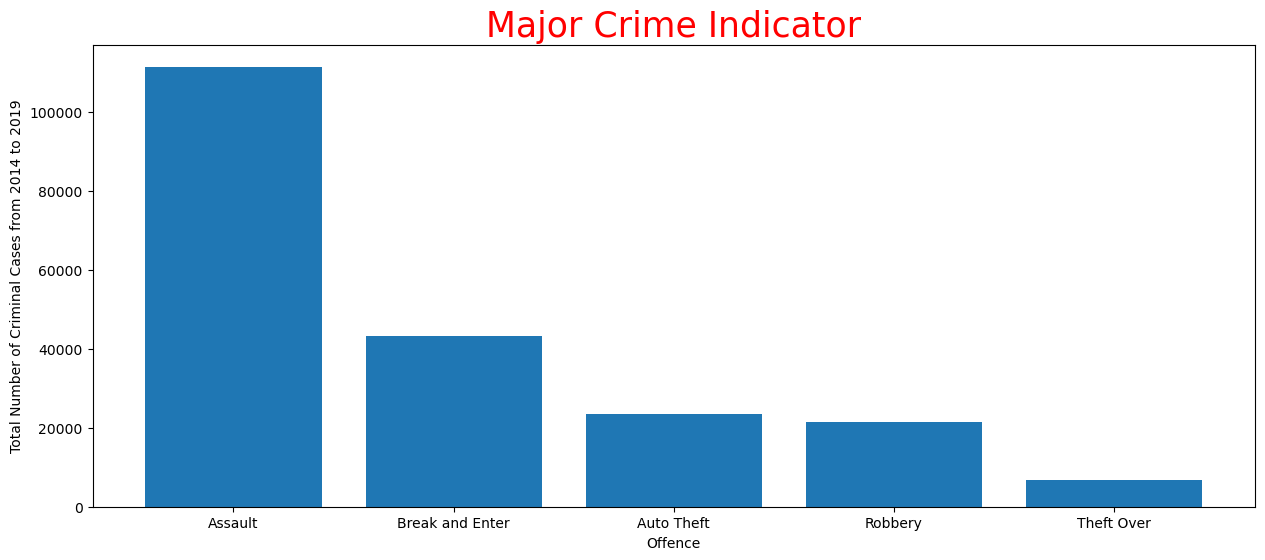

In [15]:
major_crime_indicator = df.groupby('MCI', as_index=False).size()
print(major_crime_indicator)
fig, ax = plt.subplots(figsize=(15, 6))
ct = major_crime_indicator.sort_values(by='size', ascending=False)
ax.bar(x=ct['MCI'], height=ct['size'])
ax.set_xlabel('Offence')
ax.set_ylabel('Total Number of Criminal Cases from 2014 to 2019')
ax.set_title('Major Crime Indicator', color='red', fontsize=25)
plt.show()

#### Plotting Line Chart for Total Criminal Cases from 2014 to 2019

occurrenceyear
2014.0    31638
2015.0    32316
2016.0    32809
2017.0    34561
2018.0    36323
2019.0    37674
dtype: int64


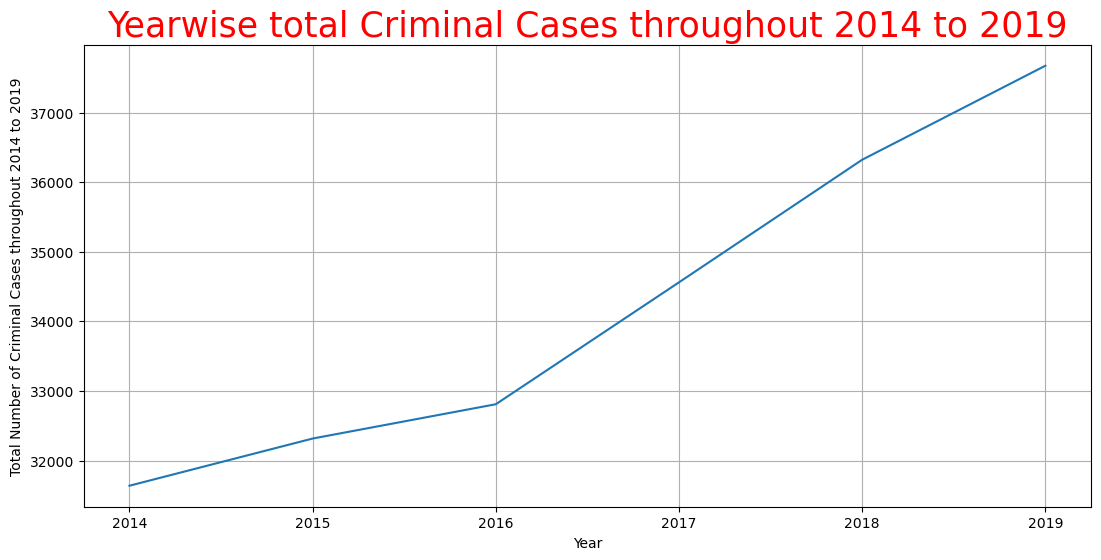

In [16]:
df2 = df[df['occurrenceyear'] > 2013]
yearwise_total_crime = df2.groupby('occurrenceyear').size()
print(yearwise_total_crime)

plt.figure(figsize=(13,6))
ct = yearwise_total_crime.sort_values(ascending=True)
ax = ct.plot.line()
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Criminal Cases throughout 2014 to 2019')
ax.set_title('Yearwise total Criminal Cases throughout 2014 to 2019',color = 'red',fontsize=25)
ax.grid(linestyle='-')
plt.show()

#### Plotting Pie chart for crime according to premisetype

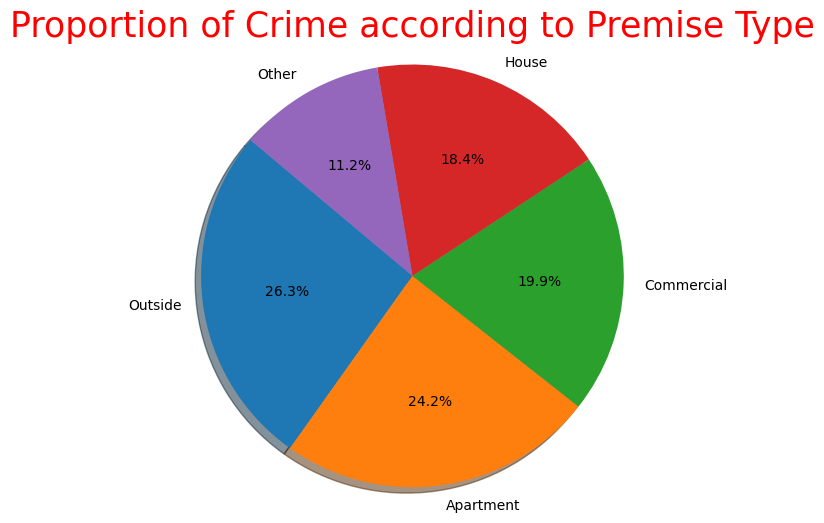

In [17]:
premise_type = df.groupby('premisetype').size()
premise_type.head()
labels = ['Outside','Apartment','Commercial','House','Other']
count = [54253,49996,41081,37927,23178]
explode = (0, 0, 0, 0, 0) 

fig, ax = plt.subplots(figsize = (6,6))
ax.pie(count, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=140)
ax.axis('equal')
plt.title("Proportion of Crime according to Premise Type", color='red', fontsize=25)
plt.show()

#### Plotting Bar graph for assault crimes in toronto

                           offence   size
0      Administering Noxious Thing    296
1    Aggravated Aslt Peace Officer     12
2               Aggravated Assault   1864
3   Aggravated Assault Avails Pros     13
4   Air Gun Or Pistol: Bodily Harm     20
5                          Assault  76124
6      Assault - Force/Thrt/Impede    257
7   Assault - Resist/ Prevent Seiz   2376
8              Assault Bodily Harm   5104
9            Assault Peace Officer   3581
10   Assault Peace Officer Wpn/Cbh    319
11             Assault With Weapon  18168
12     Crim Negligence Bodily Harm     82
13  Disarming Peace/Public Officer     72
14  Discharge Firearm - Recklessly    896
15   Discharge Firearm With Intent   1369
16              Pointing A Firearm    737
17  Set/Place Trap/Intend Death/Bh      1
18  Traps Likely Cause Bodily Harm      1
19  Unlawfully Causing Bodily Harm     13
20  Use Firearm / Immit Commit Off    118


/var/folders/z5/6c1wsnzn0fxcb5vcjbm7svg80000gn/T/ipykernel_77613/261269967.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


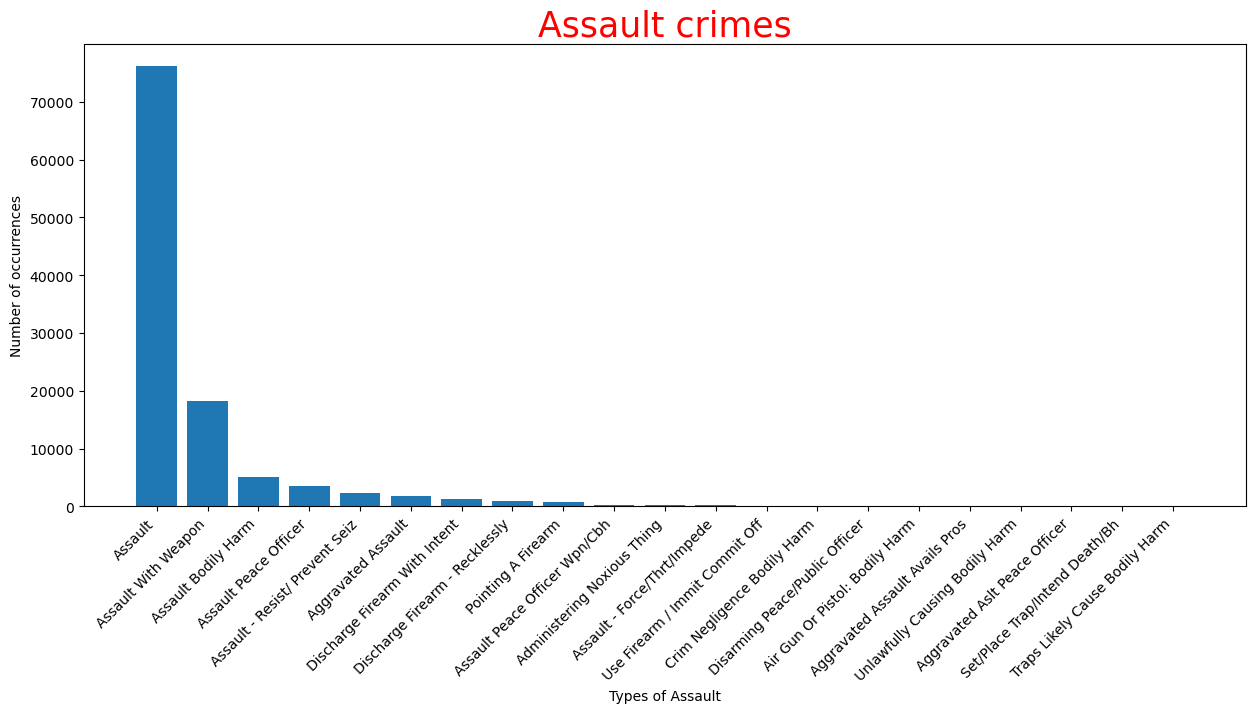

In [25]:
assault = df[df['MCI'] == 'Assault']
assault_types = assault.groupby('offence', as_index=False).size()
print(assault_types)
fig, ax = plt.subplots(figsize=(15, 6))
ct = assault_types.sort_values(by='size', ascending=False)  # Specify the column to sort by
ax.bar(x=ct['offence'], height=ct['size'])
ax.set_xlabel('Types of Assault')
ax.set_ylabel('Number of occurrences')
ax.set_title('Assault crimes', color='red', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#### Plotting line graph for crime types by hour of day

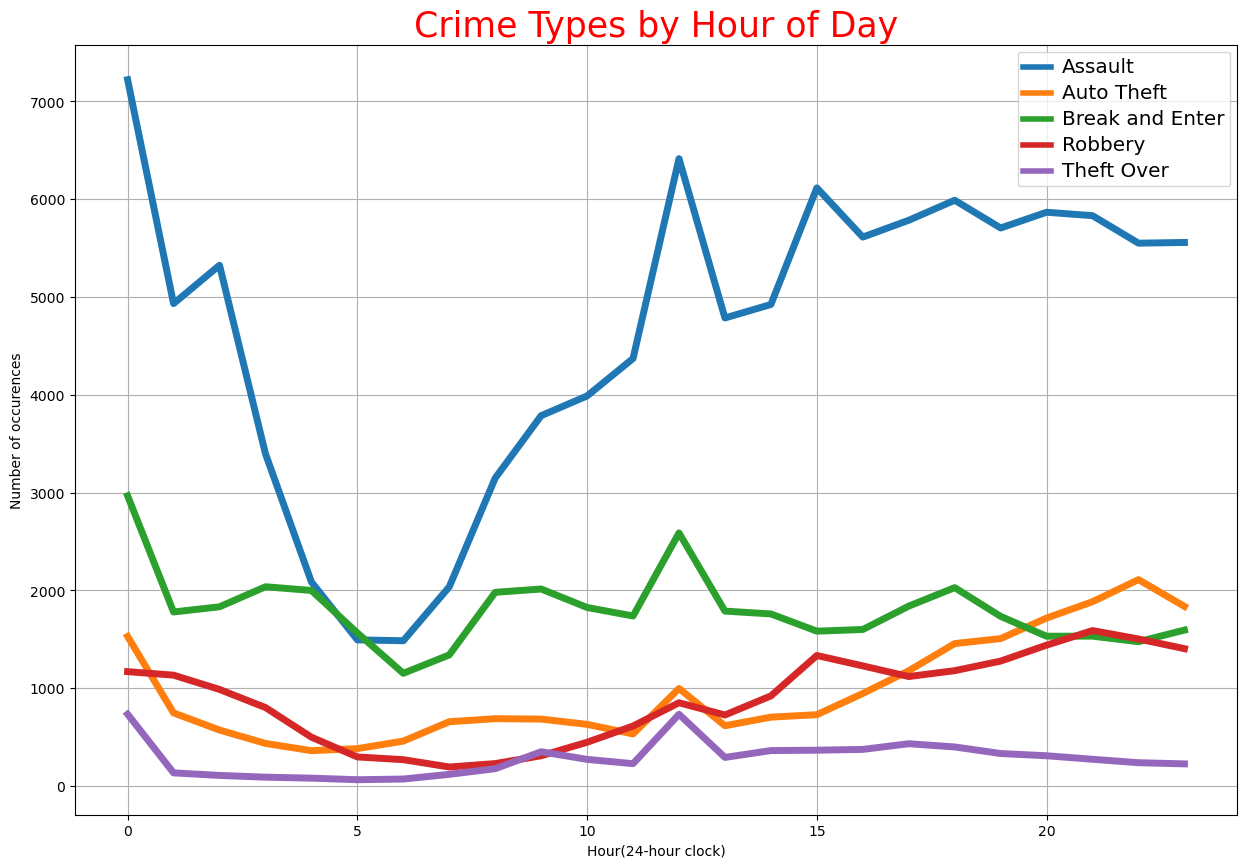

In [27]:
hour_crime_group = df.groupby(['occurrencehour','MCI'],as_index=False).agg({'Total':'sum'})

fig, ax = plt.subplots(figsize=(15,10))
hour_crime_group.groupby('MCI').plot(x="occurrencehour", y="Total", ax=ax,linewidth=5)
ax.set_xlabel('Hour(24-hour clock)')
ax.set_ylabel('Number of occurences')
ax.set_title('Crime Types by Hour of Day',color = 'red',fontsize=25)
ax.grid(linestyle='-')
leg = plt.legend([v[0] for v in hour_crime_group.groupby('MCI')['MCI']])
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='x-large')
plt.show()

#### Plotting bar graph for Neighbourhoods with most crimes Top 20

                               Neighbourhood  size
0     Waterfront Communities-The Island (77)  7747
1                   Bay Street Corridor (76)  6817
2                 Church-Yonge Corridor (75)  6232
3                 West Humber-Clairville (1)  5702
4                             Moss Park (73)  4786
5               York University Heights (27)  3989
6                  Downsview-Roding-CFB (26)  3974
7                  Kensington-Chinatown (78)  3823
8                               Woburn (137)  3798
9                            West Hill (136)  3497
10           Islington-City Centre West (14)  3287
11                                Annex (95)  2917
12               Glenfield-Jane Heights (25)  2776
13                      South Riverdale (70)  2726
14                 Clairlea-Birchmount (120)  2711
15  Dovercourt-Wallace Emerson-Junction (93)  2639
16                             Malvern (132)  2624
17     Mount Olive-Silverstone-Jamestown (2)  2591
18  Mimico (includes Humber Bay

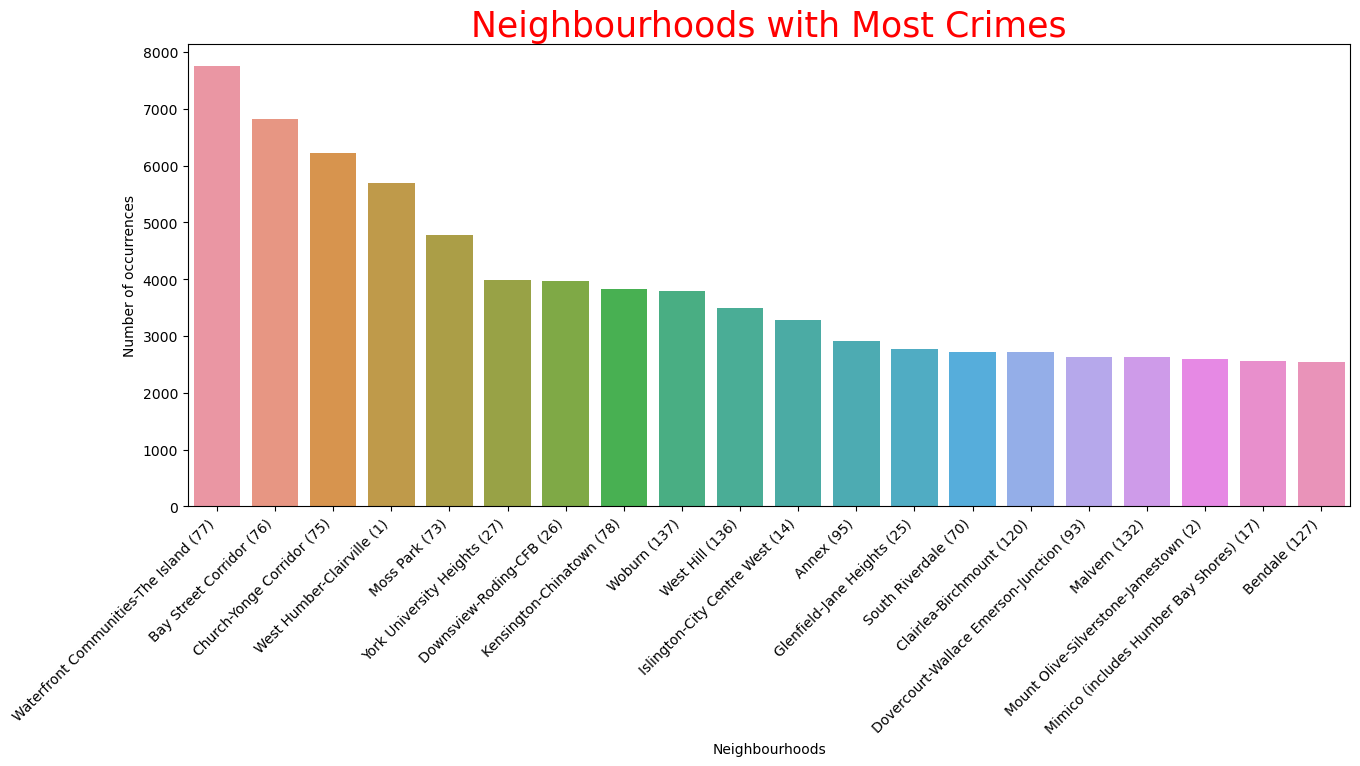

In [36]:
location_group = df.groupby('Neighbourhood', as_index=False).size().sort_values(by='size', ascending=False).head(20)
print(location_group)
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=location_group, x='Neighbourhood', y='size', order=location_group['Neighbourhood'])
ax.set_xlabel('Neighbourhoods')
ax.set_ylabel('Number of occurrences')
ax.set_title('Neighbourhoods with Most Crimes', color='red', fontsize=25)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

#### Plotting Heatmap for Major Crime indicator by Month

/var/folders/z5/6c1wsnzn0fxcb5vcjbm7svg80000gn/T/ipykernel_77613/927577910.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  crime_count = mci_monthwise.pivot("MCI","occurrencemonth","Total" )


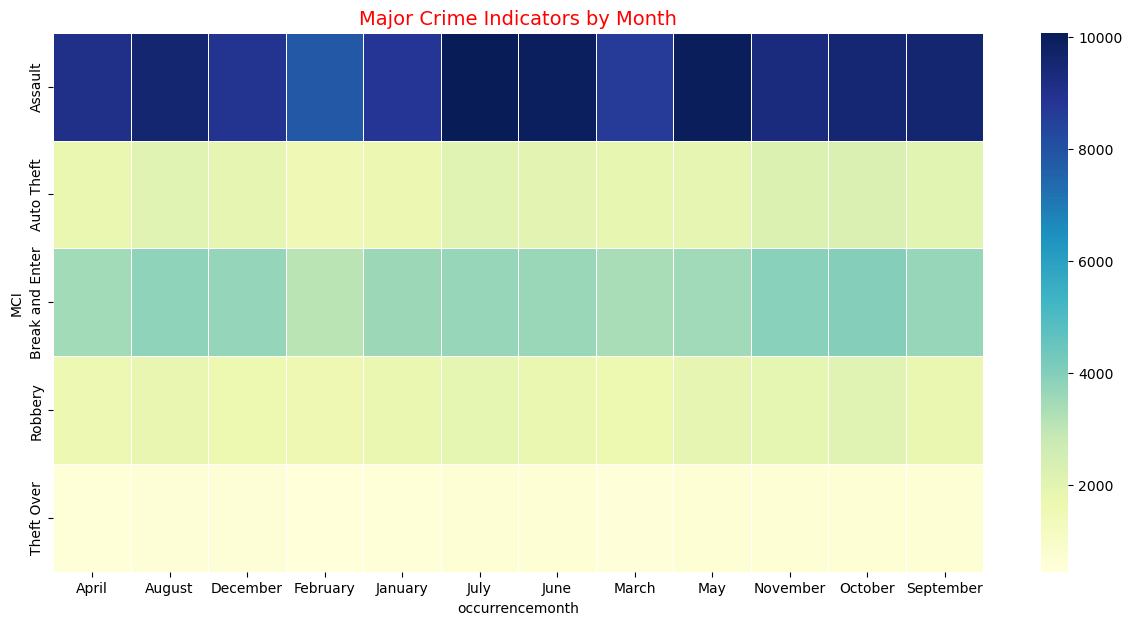

In [37]:
mci_monthwise = df.groupby(['occurrencemonth','MCI'],as_index=False).agg({'Total':'sum'})

plt.figure(figsize=(15, 7))
crime_count = mci_monthwise.pivot("MCI","occurrencemonth","Total" )

plt.yticks(rotation=1)
ax = sns.heatmap(crime_count,cmap="YlGnBu", linewidths=.5)
plt.title("Major Crime Indicators by Month",color = 'red',fontsize=14)
plt.show()

### Data Preprocessing

In [38]:
col_list = ['occurrenceyear',	'occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek','occurrencehour','MCI',	'Division',	'Hood_ID','premisetype']

df2 = df[col_list]
df2 = df2[df2['occurrenceyear'] > 2013]

#Factorize dependent variable column:
crime_var = pd.factorize(df2['MCI'])
df2['MCI'] = crime_var[0]
definition_list_MCI = crime_var[1]

#factorize independent variables:
premise_var = pd.factorize(df2['premisetype'])
df2['premisetype'] = premise_var[0]
definition_list_premise = premise_var[1] 

year_var = pd.factorize(df2['occurrenceyear'])
df2['occurrenceyear'] = year_var[0]
definition_list_year = year_var[1] 

month_var = pd.factorize(df2['occurrencemonth'])
df2['occurrencemonth'] = month_var[0]
definition_list_month = month_var[1] 

day_var = pd.factorize(df2['occurrenceday'])
df2['occurenceday'] = day_var[0]
definition_list_day = day_var[1] 

dayweek_var = pd.factorize(df2['occurrencedayofweek'])
df2['occurrencedayofweek'] = dayweek_var[0]
definition_list_day = dayweek_var[1] 

division_var = pd.factorize(df2['Division'])
df2['Division'] = division_var[0]
definition_list_division = division_var[1] 

hood_var = pd.factorize(df2['Hood_ID'])
df2['Hood_ID'] = hood_var[0]
definition_list_hood = hood_var[1] 

hour_var = pd.factorize(df2['occurrencehour'])
df2['occurrencehour'] = hour_var[0]
definition_list_hour = hour_var[1] 

dayyear_var = pd.factorize(df2['occurrencedayofyear'])
df2['occurrencedayofyear'] = dayyear_var[0]
definition_list_dayyear = dayyear_var[1] 

#### Splitting the dataset into training and tests set

In [39]:
X = df2.drop(['MCI'],axis=1).values
y = df2['MCI'].values

#split the data into train and test sets for numeric encoded dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)
binary_encoder = OneHotEncoder(sparse=False,categories='auto')
encoded_X = binary_encoder.fit_transform(X)
X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(encoded_X, y, test_size = 0.25, random_state = 21)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Crime Predictions
---
### Predicting the type of major crime committed based on time of day, neighbourhood, division, year, month, etc.
#### Classification Analysis
When the true goal of data analysis is to be able to predict which of several non-overlapping groups an observation belongs to, the techniques we use are known as classification techniques.It is a Data analysis task, i.e. the process of finding a model that describes and distinguishes data classes and concepts. Classification is the problem of identifying to which of a set of categories (subpopulations), a new observation belongs to, on the basis of a training set of data containing observations and whose categories membership is known.


---
#### Data Preprocessing

In [47]:
# Numeric Encoded Model
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy of Random Forest : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, target_names=definition_list_MCI)) 

Accuracy of Random Forest :  0.637217276109953
[[23910  2266   667    63   835]
 [ 5238  5044    71    67   280]
 [ 2948   306  1754    15   337]
 [ 1122   339    50    27   141]
 [ 2830   741   278    28  1974]]
                 precision    recall  f1-score   support

        Assault       0.66      0.86      0.75     27741
Break and Enter       0.58      0.47      0.52     10700
        Robbery       0.62      0.33      0.43      5360
     Theft Over       0.14      0.02      0.03      1679
     Auto Theft       0.55      0.34      0.42      5851

       accuracy                           0.64     51331
      macro avg       0.51      0.40      0.43     51331
   weighted avg       0.61      0.64      0.61     51331



In [43]:
#One Hot Encoded Model
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_OH, y_train_OH)
y_pred_OH = classifier.predict(X_test_OH)

print("Accuracy of Random Forest with OneHotEncoder : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test_OH, y_pred_OH)) 
print(classification_report(y_test_OH,y_pred_OH, target_names=definition_list_MCI))

Accuracy of Random Forest with OneHotEncoder :  0.637217276109953
[[24486  1974   511    34   736]
 [ 5211  5179    38    48   224]
 [ 3097   254  1652     8   349]
 [ 1190   300    27    24   138]
 [ 2987   606   176    19  2063]]
                 precision    recall  f1-score   support

        Assault       0.66      0.88      0.76     27741
Break and Enter       0.62      0.48      0.54     10700
        Robbery       0.69      0.31      0.43      5360
     Theft Over       0.18      0.01      0.03      1679
     Auto Theft       0.59      0.35      0.44      5851

       accuracy                           0.65     51331
      macro avg       0.55      0.41      0.44     51331
   weighted avg       0.63      0.65      0.62     51331



In [44]:
#Balanced Class Weight doesn't make a big difference for results:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42, class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 

print("Accuracy of Random Forest with Balanced class weight: ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, target_names=definition_list_MCI))

Accuracy of Random Forest with Balanced class weight:  0.635873059165027
[[24024  2231   648    59   779]
 [ 5439  4867    60    69   265]
 [ 2982   257  1803    16   302]
 [ 1131   330    52    30   136]
 [ 2964   727   216    28  1916]]
                 precision    recall  f1-score   support

        Assault       0.66      0.87      0.75     27741
Break and Enter       0.58      0.45      0.51     10700
        Robbery       0.65      0.34      0.44      5360
     Theft Over       0.15      0.02      0.03      1679
     Auto Theft       0.56      0.33      0.41      5851

       accuracy                           0.64     51331
      macro avg       0.52      0.40      0.43     51331
   weighted avg       0.61      0.64      0.60     51331



#### Random Forest Classifier with One hot Encoder shows modest improvement in accuracy with F1-score of 0.65
---
### Conclusion :

A multi-class classification model using a Random Forest classifier is built to predict the type of major crime committed based on time of day, neighbourhood, division, year, month, etc. The dataset includes every major crime committed from 2014-2019* in the city of Toronto, with detailed information about the location and time of offence. The data contains only categorical variables so the modeling process tests both numeric encoding and OneHot encoding, with some improvement with the latter approach.
The model performs reasonably well on F1-score (precision and recall) for a five-class classification problem. Though the data set is somewhat unbalanced towards assaults (higher volume), balancing class weights does not materially impact model performance.